In [231]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from akvmodel import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
NUM_AGENTS = 4
NUM_STEPS = 1

In [233]:
initial_configurations = [
    [InitialConfigurations.uniform(NUM_AGENTS), "Uniform"],
    [InitialConfigurations.mildly(NUM_AGENTS), "Mildly polarized"],
    [InitialConfigurations.extreme(NUM_AGENTS), "Extremely polarized"],
    [InitialConfigurations.tripolar(NUM_AGENTS), "Tripolar"],
]
influence_graphs = [
    [InfluenceGraphs.clique(NUM_AGENTS), "Clique"],
    [InfluenceGraphs.circular(NUM_AGENTS), "Circular"],
    [InfluenceGraphs.faintly(NUM_AGENTS), "Faintly connected"],
    [InfluenceGraphs.disconnected(NUM_AGENTS), "Disconnected"],
    [InfluenceGraphs.malleable_influencers(NUM_AGENTS), "Malleable influencers"],
    [InfluenceGraphs.unrelenting_influencers(NUM_AGENTS), "Unrelenting influencers"],
]

### Classic belief update and dynamic influence

In [234]:
models: list[list[AKV]] = []
for influence_graph in influence_graphs:
    line = []
    for initial_configuration in initial_configurations:
        model = AKV(
            initial_configuration[0],
            influence_graph[0],
            UpdateFunctions.dynamic_influence_with_belief_update,
        )
        for _ in range(NUM_STEPS):
            model.update()
        line = line + [model]
    models = models + [line]

In [235]:
polarization = []
for i in range(len(influence_graphs)):
    row = []
    for j in range(len(initial_configurations)):
        row += [models[i][j].get_polarization()[0]]
    polarization += [row]

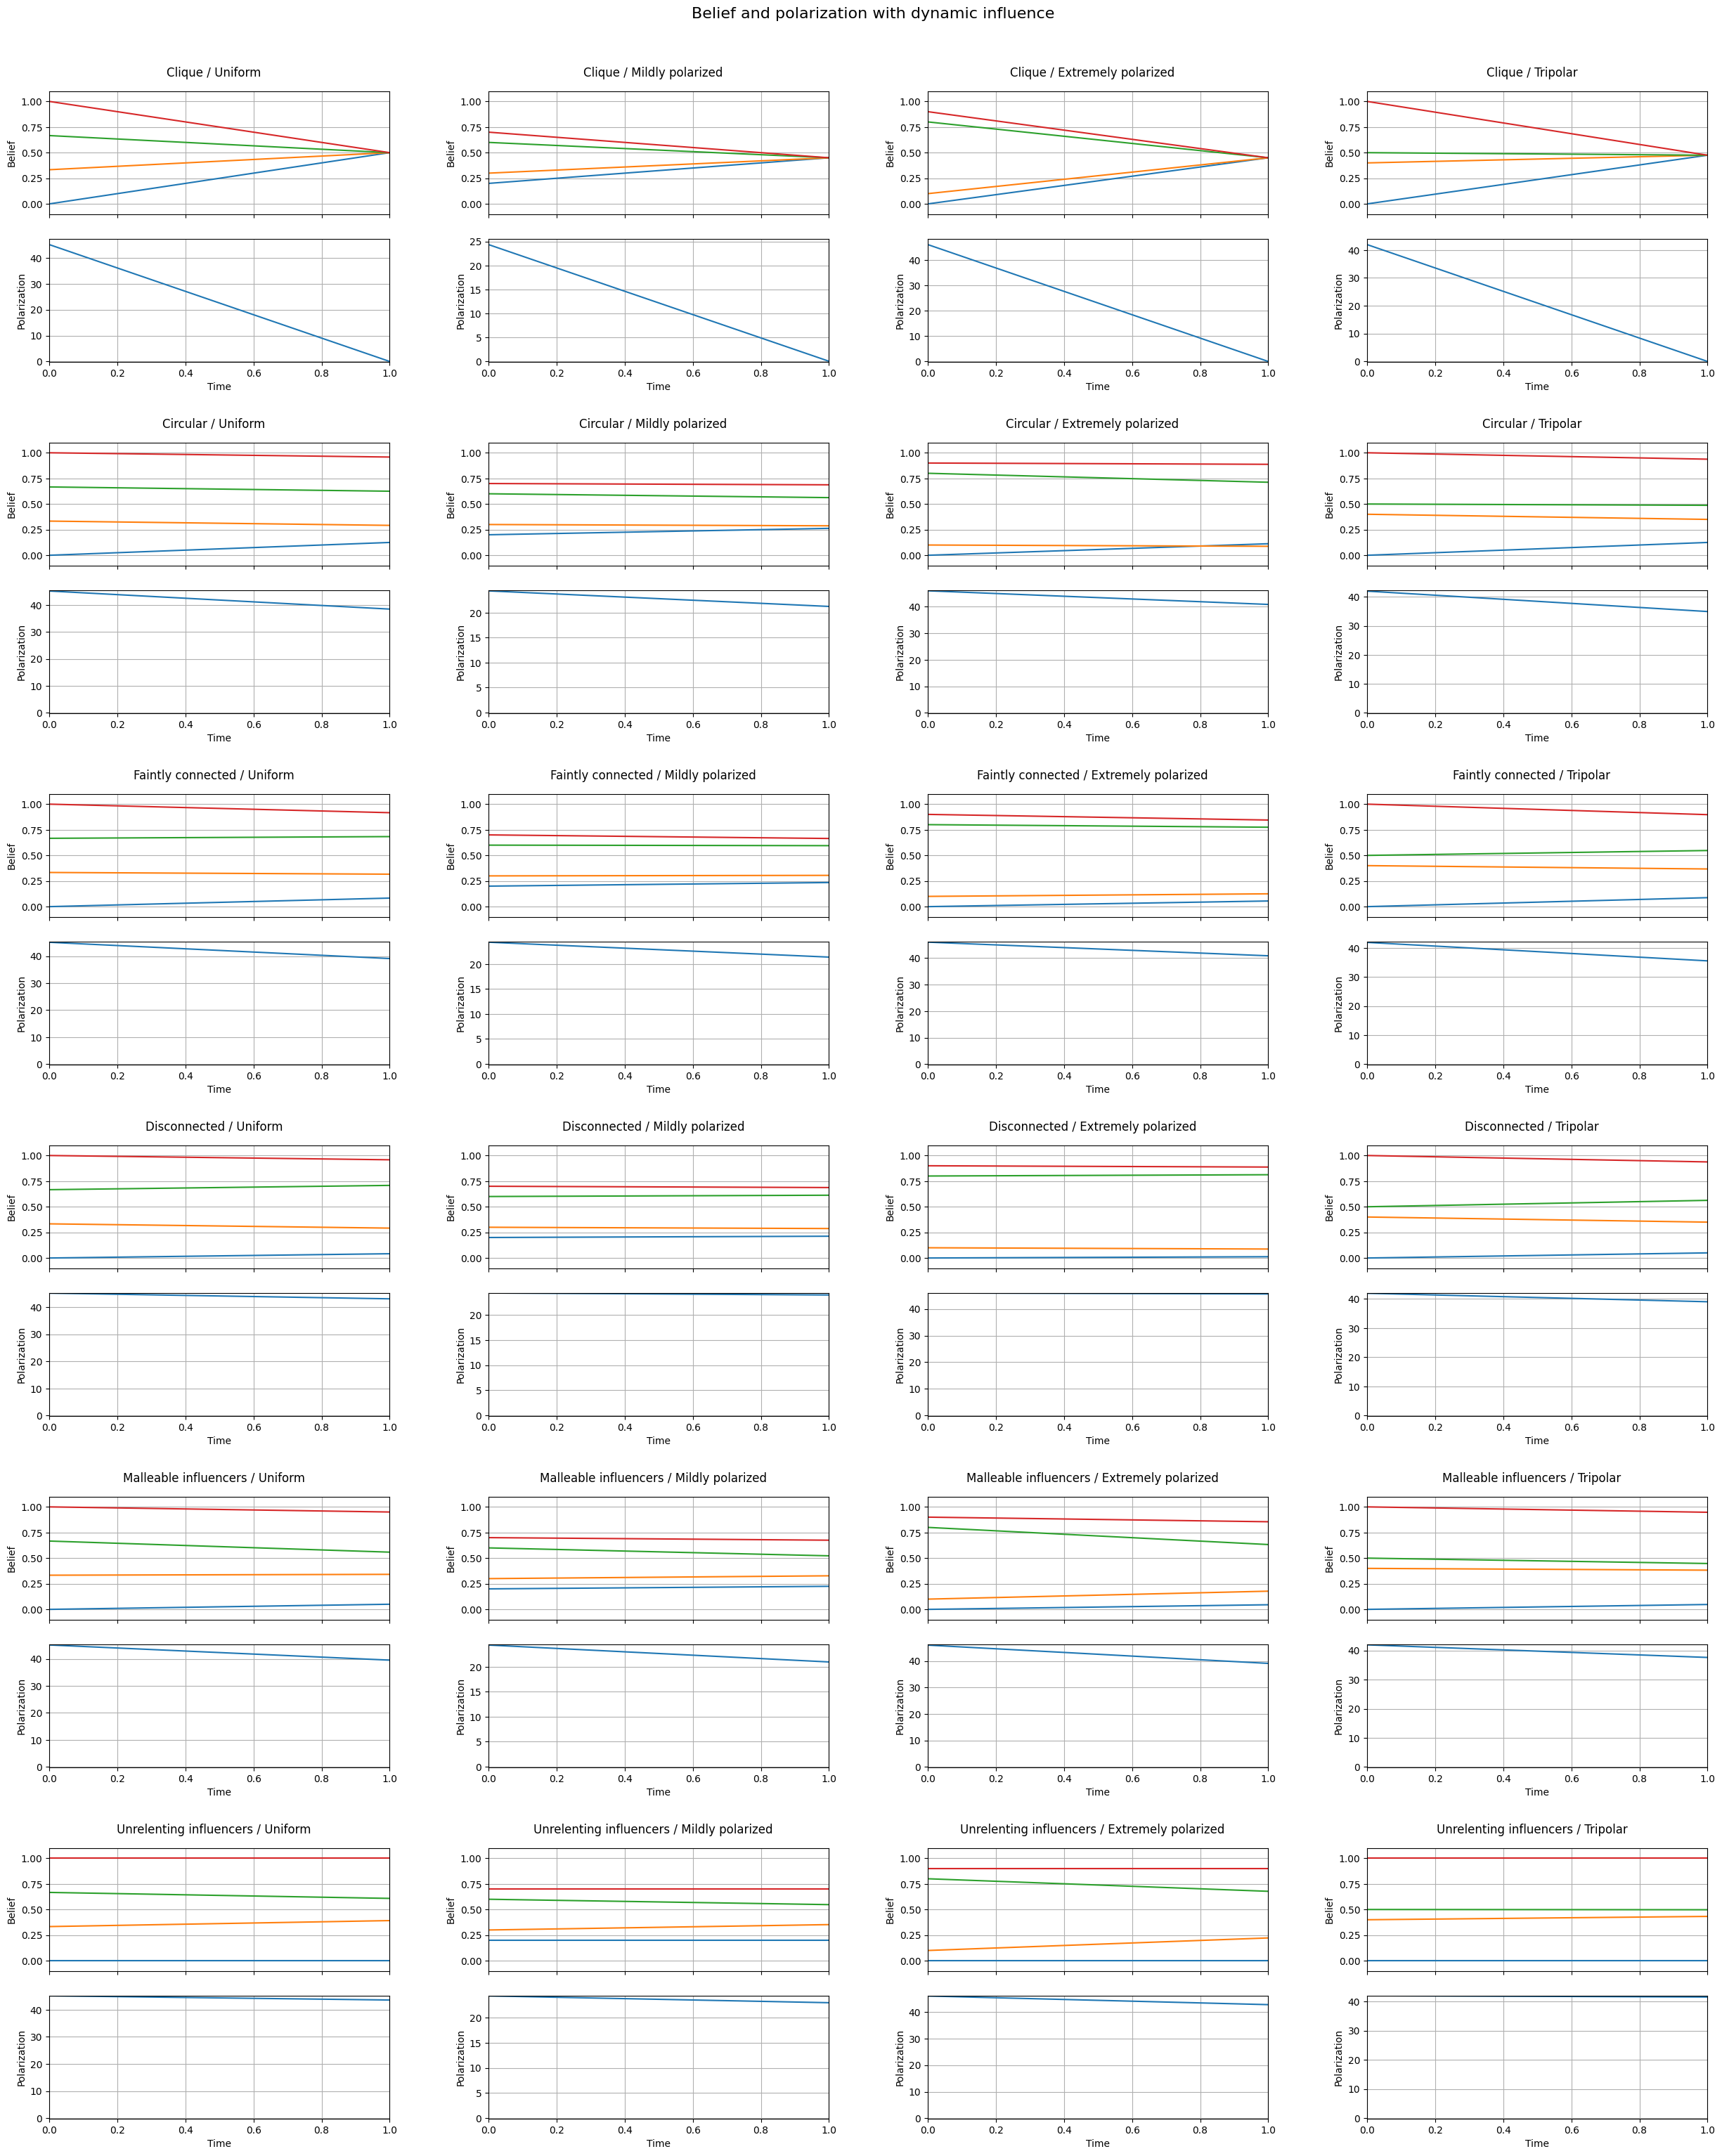

In [236]:
fig = plt.figure(figsize=(25, 30))
fig.suptitle("Belief and polarization with dynamic influence", fontsize=16, y=1.02)
subfigs = fig.subfigures(len(influence_graphs), len(initial_configurations))
for i in range(len(influence_graphs)):
    for j in range(len(initial_configurations)):
        subfig = subfigs[i][j]
        subfig.suptitle(
            f"{influence_graphs[i][1]} / {initial_configurations[j][1]}", y=0.95
        )
        axs = subfig.subplots(2, 1, sharex=True)
        belief_ax = axs[0]
        polarization_ax = axs[1]
        belief_ax.plot(get_belief_array_history(models[i][j].belief_state_history))
        belief_ax.set_xlim(0, NUM_STEPS)
        belief_ax.set_ylim(-0.1, 1.1)
        belief_ax.set_ymargin(1)
        belief_ax.set_ymargin(1)
        belief_ax.set_ylabel("Belief")
        belief_ax.grid(True)
        polarization_ax.plot(polarization[i][j])
        polarization_ax.set_xlim(0, NUM_STEPS)
        polarization_ax.set_ylim(-0.1)
        polarization_ax.set_ymargin(1)
        polarization_ax.set_ymargin(1)
        polarization_ax.set_xlabel("Time")
        polarization_ax.set_ylabel("Polarization")
        polarization_ax.grid(True)

In [237]:
influence_polarizations = [
    models[i][0].get_influence_polarization() for i in range(len(influence_graphs))
]

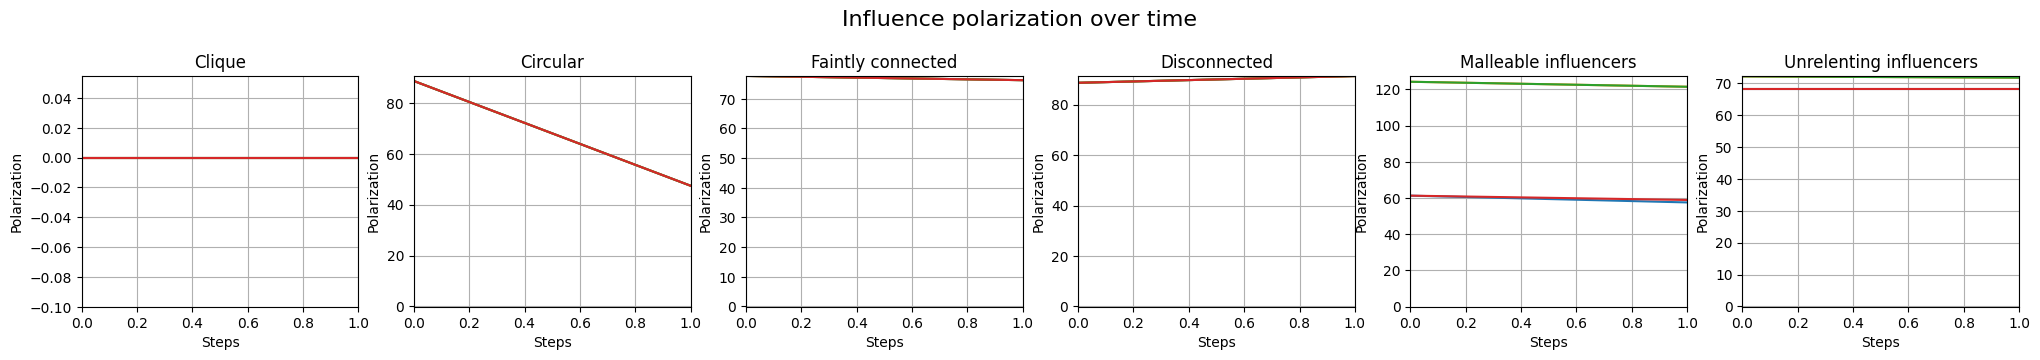

In [238]:
fig, axs = plt.subplots(1, len(influence_graphs), figsize=[25, 3])
fig.suptitle(
    f"Influence polarization over time", fontsize=16, y=1.1
)
for i in range(len(influence_graphs)):
    ax: plt.axes = axs[i]
    ax.plot(np.array(influence_polarizations[i]))
    ax.set_xlim(0, NUM_STEPS)
    ax.set_ylim(-0.1)
    ax.set_ymargin(1)
    ax.set_ymargin(1)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Polarization")
    ax.set_title(f"{influence_graphs[i][1]}")
    ax.grid(True)


In [239]:
def is_flow_conservative(influence_graph):
    for i in range(NUM_AGENTS):
        if not np.isclose(np.sum(influence_graph[i, :]), np.sum(influence_graph[:, i])):
            return False
    else:
        return True

In [240]:
flow_data = []
for i in range(len(influence_graphs)):
    row = []
    for j in range(len(initial_configurations)):
        row += [
            [
                is_flow_conservative(models[i][j].influence_graph_history[k])
                for k in range(NUM_STEPS)
            ]
        ]
    flow_data += [row]

In [241]:
for i in range(len(influence_graphs)):
    for j in range(len(initial_configurations)):
        print(
            f"{''.join(['T' if value else 'F' for value in flow_data[i][j]])} - {influence_graphs[i][1]} | {initial_configurations[j][1]}"
        )

T - Clique | Uniform
T - Clique | Mildly polarized
T - Clique | Extremely polarized
T - Clique | Tripolar
T - Circular | Uniform
T - Circular | Mildly polarized
T - Circular | Extremely polarized
T - Circular | Tripolar
T - Faintly connected | Uniform
T - Faintly connected | Mildly polarized
T - Faintly connected | Extremely polarized
T - Faintly connected | Tripolar
T - Disconnected | Uniform
T - Disconnected | Mildly polarized
T - Disconnected | Extremely polarized
T - Disconnected | Tripolar
F - Malleable influencers | Uniform
F - Malleable influencers | Mildly polarized
F - Malleable influencers | Extremely polarized
F - Malleable influencers | Tripolar
F - Unrelenting influencers | Uniform
F - Unrelenting influencers | Mildly polarized
F - Unrelenting influencers | Extremely polarized
F - Unrelenting influencers | Tripolar


In [242]:
len(models)

6

In [243]:
models[2][1].influence_graph_history

array([[[1.    , 0.5   , 0.1   , 0.1   ],
        [0.5   , 1.    , 0.1   , 0.1   ],
        [0.1   , 0.1   , 1.    , 0.5   ],
        [0.1   , 0.1   , 0.5   , 1.    ]],

       [[1.    , 0.5425, 0.1325, 0.1325],
        [0.5425, 1.    , 0.1325, 0.1325],
        [0.1325, 0.1325, 1.    , 0.5425],
        [0.1325, 0.1325, 0.5425, 1.    ]]])

In [244]:
0.1+0.25*(0.1*(0.5-0.1) + 0.1*(1-0.1) + 0.5*(0.1-0.1) + 1*(0.1-0.1))

0.1325